In [1]:

from IPython.display import HTML, Image

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import animation

import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize": (10, 10)})

# Break from default darkgrid for better printing on paper
sns.set_style("whitegrid")

# External Includes
import torch
from torch.nn import Parameter
from torch.optim import SGD

# Internal Includes
from rfml.nn.F import psd
from rfml.ptradio import RRC

In [2]:
def plot_freq(f, ax, label=None, ls="-"):
    # Input is [BxCxF] --> [F]
    f = f[0,0,:].detach().numpy()
    freqs = np.fft.fftfreq(n=f.shape[0])
    
    # Convert to dB
    f = 10.0*np.log10(f)
    
    # Sort by the actual frequency instead of the DFT representation
    idx = np.argsort(freqs)
    f = f[idx]
    freqs = freqs[idx]
    
    ret = ax.plot(freqs, f, linestyle=ls, label=label)
    
    ax.set_ylabel("Power Spectral Density (dB)", fontsize=16, fontweight="bold")
    ax.set_xlabel("Normalized Frequency", fontsize=16, fontweight="bold")
    
    if label is not None:
        ax.legend()
        
    return ret

def plot_time(t, x, ax, label=None):
    ret = ax.plot(t, x, label=label)
    
    ax.set_ylabel("Amplitude", fontsize=16, fontweight="bold")
    ax.set_xlabel("Sample Number (time)", fontsize=16, fontweight="bold")
    
    if label is not None:
        ax.legend()
        
    return ret

In [3]:
n_time = 1024

In [4]:
# Create a white gaussian noise signal -- therefore ~ flat across frequency
mean = torch.zeros((1, 1, 2, n_time))
std = torch.ones((1, 1, 2, n_time)) / 25.0
signal = torch.nn.Parameter(torch.normal(mean, std, ))
t = np.arange(n_time)

torch.Size([1, 1, 2, 1024])
torch.Size([1, 1, 1024])


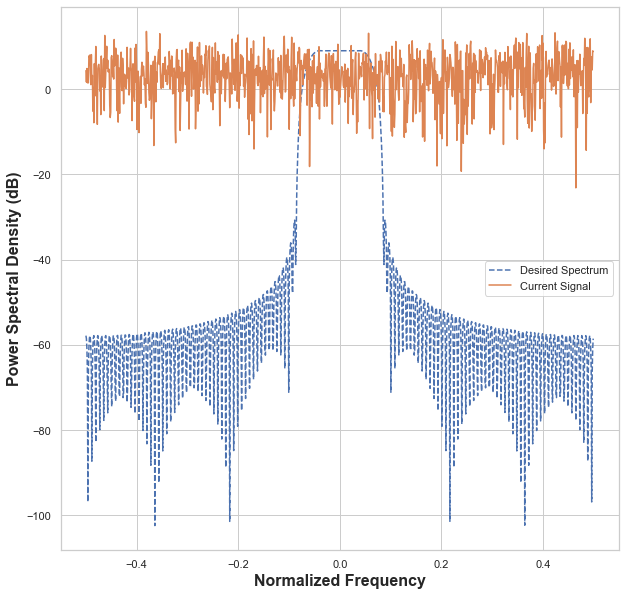

In [5]:
# Define our "target" PSD profile to be the spectrum of the root raised cosine
rrc = RRC()
impulse = rrc.impulse_response
# The impulse response is real valued so we'll make it "complex" by just adding
# another dimension in for IQ and setting the imaginary portion to 0
impulse = torch.cat((impulse, impulse), dim=2)
impulse[:,:,1,:] = 0.0

# In order to match dimensions with our desired frequency resolution by
# setting n_time to be the FFT length -- we must pad with some zeros
_to_pad = torch.zeros((impulse.shape[0], impulse.shape[1], impulse.shape[2], n_time - impulse.shape[3]))
impulse = torch.cat((impulse, _to_pad), dim=3)

target_psd = psd(impulse)
print(impulse.size())
print(target_psd.size())

fig, ax = plt.subplots(1, 1, figsize=(10,10))
plot_freq(target_psd, ax, label="Desired Spectrum", ls="--")
plot_freq(psd(signal), ax, label="Current Signal")

plt.show()

In [6]:
optimizer = SGD((signal,), lr=50e-4, momentum=0.9)

Saving
tensor([[[0.6444, 0.9264, 1.3898,  ..., 1.5673, 0.4446, 2.8359]]],
       grad_fn=<SqueezeBackward1>)
0
25.082143783569336
tensor([[[0.8475, 1.2065, 1.7809,  ..., 1.9961, 0.5889, 3.4502]]],
       grad_fn=<SqueezeBackward1>)
1
12.413346290588379
tensor([[[1.3412, 1.8759, 2.6903,  ..., 2.9829, 0.9438, 4.7615]]],
       grad_fn=<SqueezeBackward1>)
2
5.503686904907227
tensor([[[2.3278, 3.1724, 4.3648,  ..., 4.7656, 1.6695, 6.8381]]],
       grad_fn=<SqueezeBackward1>)
3
2.610799551010132
tensor([[[4.1177, 5.3961, 6.9945,  ..., 7.4764, 3.0414, 9.3918]]],
       grad_fn=<SqueezeBackward1>)
4
1.7702319622039795
tensor([[[ 6.9659,  8.5903, 10.2227,  ..., 10.6193,  5.3972, 11.4455]]],
       grad_fn=<SqueezeBackward1>)
5
3.04359769821167
tensor([[[10.5117, 11.8520, 12.6151,  ..., 12.6705,  8.7908, 11.8041]]],
       grad_fn=<SqueezeBackward1>)
6
4.388055801391602
tensor([[[13.1112, 13.2283, 12.5471,  ..., 12.2316, 12.2146, 10.3728]]],
       grad_fn=<SqueezeBackward1>)
7
4.4590744972229

tensor([[[7.7501, 7.7632, 7.8061,  ..., 7.8278, 7.7650, 7.9132]]],
       grad_fn=<SqueezeBackward1>)
67
0.004268723074346781
tensor([[[7.7774, 7.8242, 7.8932,  ..., 7.9201, 7.7532, 8.0009]]],
       grad_fn=<SqueezeBackward1>)
68
0.003375010099261999
tensor([[[7.8668, 7.9303, 8.0025,  ..., 8.0271, 7.8158, 8.0754]]],
       grad_fn=<SqueezeBackward1>)
69
0.0028320983983576298
tensor([[[7.9852, 8.0442, 8.0972,  ..., 8.1131, 7.9268, 8.1139]]],
       grad_fn=<SqueezeBackward1>)
70
0.002799439011141658
tensor([[[8.0924, 8.1286, 8.1477,  ..., 8.1520, 8.0472, 8.1070]]],
       grad_fn=<SqueezeBackward1>)
71
0.0028782952576875687
tensor([[[8.1546, 8.1584, 8.1415,  ..., 8.1354, 8.1376, 8.0617]]],
       grad_fn=<SqueezeBackward1>)
72
0.0026771442499011755
tensor([[[8.1554, 8.1291, 8.0864,  ..., 8.0744, 8.1708, 7.9967]]],
       grad_fn=<SqueezeBackward1>)
73
0.00224400800652802
tensor([[[8.1006, 8.0564, 8.0056,  ..., 7.9936, 8.1414, 7.9351]]],
       grad_fn=<SqueezeBackward1>)
74
0.001896634

tensor([[[7.9800, 7.9831, 7.9885,  ..., 7.9938, 7.9824, 7.9885]]],
       grad_fn=<SqueezeBackward1>)
133
0.00019192940089851618
tensor([[[7.9839, 7.9870, 7.9919,  ..., 7.9969, 7.9858, 7.9902]]],
       grad_fn=<SqueezeBackward1>)
134
0.00018851037020795047
tensor([[[7.9877, 7.9902, 7.9941,  ..., 7.9987, 7.9899, 7.9904]]],
       grad_fn=<SqueezeBackward1>)
135
0.00018537024152465165
tensor([[[7.9904, 7.9918, 7.9945,  ..., 7.9987, 7.9934, 7.9892]]],
       grad_fn=<SqueezeBackward1>)
136
0.00018196800374425948
tensor([[[7.9910, 7.9914, 7.9930,  ..., 7.9970, 7.9951, 7.9872]]],
       grad_fn=<SqueezeBackward1>)
137
0.0001782072358764708
tensor([[[7.9897, 7.9894, 7.9905,  ..., 7.9943, 7.9947, 7.9850]]],
       grad_fn=<SqueezeBackward1>)
138
0.0001744320907164365
tensor([[[7.9871, 7.9865, 7.9877,  ..., 7.9917, 7.9925, 7.9834]]],
       grad_fn=<SqueezeBackward1>)
139
0.00017093548376578838
tensor([[[7.9840, 7.9837, 7.9857,  ..., 7.9899, 7.9895, 7.9828]]],
       grad_fn=<SqueezeBackward1

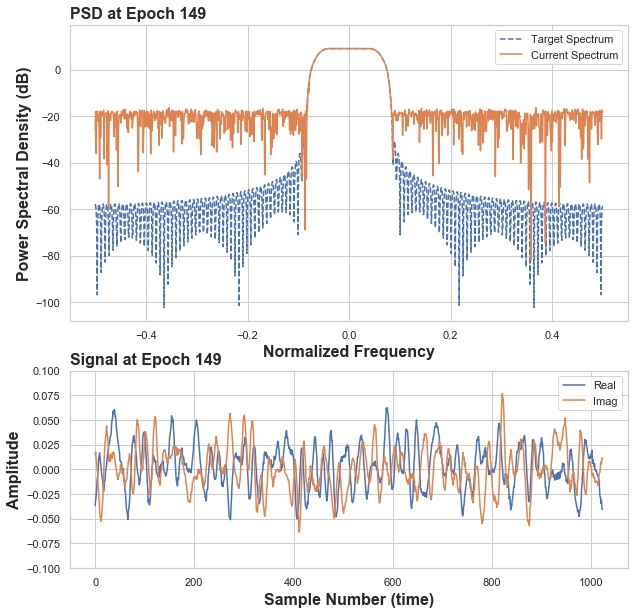

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10,10), gridspec_kw={"height_ratios": [3, 2]})

#axes[0].axhline(0, ls="--", color="black")
#axes[0].axvline(0, ls="--", color="black")

#axes[0].set_xlabel("I", fontsize=16)
#axes[0].set_ylabel("Q", fontsize=16)

#axes[0].set_xlim([-1, 1])
#axes[0].set_ylim([-1, 1])

#axes[0].set_aspect("equal", "box")

#axes[1].set_xlabel("Sample Number", fontsize=16)
#axes[1].set_ylabel("Amplitude", fontsize=16)

#axes[1].set_xlim([-1, 1])
axes[1].set_ylim([-0.1, 0.1])

#axes[1].set_aspect("equal", "box")


def init():
    # Compute PSD
    cur_psd = psd(signal)
    # Input is [BxCxF] --> [F]
    f = cur_psd[0,0,:].detach().numpy()
    freqs = np.fft.fftfreq(n=f.shape[0])
    
    # Convert to dB
    f = 10.0*np.log10(f)
    
    # Sort by the actual frequency instead of the DFT representation
    idx = np.argsort(freqs)
    f = f[idx]
    freqs = freqs[idx]
    ret = psd_plot.set_data(freqs, f)
    
    # Update time plot
    _signal = signal.detach().numpy()[0,0,:,:]
    timeR.set_data(t, _signal[0,:])
    timeI.set_data(t, _signal[1,:])
    
    return psd_plot,

def animate(i):
    cur_psd = psd(signal)
    print(cur_psd)
    loss = torch.mean((cur_psd - target_psd)**2)
    print(i)
    print(loss.item())

    loss.backward()
    optimizer.step()
    signal.grad.zero_()

    axes[0].set_title("PSD at Epoch {}".format(i), fontweight="bold", fontsize=16, loc="left")
    #axes[0].text(s=r"$E[EVM(\cdot)]$ is {:.3f}".format(loss.item()), x=-0.9, y=0.9, fontsize=12,
    #             horizontalalignment="left", bbox=dict(facecolor="white", alpha=0.5))
    axes[1].set_title("Signal at Epoch {}".format(i), fontweight="bold", fontsize=16, loc="left")

    # Update time plot
    _signal = signal.detach().numpy()[0,0,:,:]
    timeR.set_data(t, _signal[0,:])
    timeI.set_data(t, _signal[1,:])
    
    # Compute PSD
    # Input is [BxCxF] --> [F]
    f = cur_psd[0,0,:].detach().numpy()
    freqs = np.fft.fftfreq(n=f.shape[0])
    
    # Convert to dB
    f = 10.0*np.log10(f)
    
    # Sort by the actual frequency instead of the DFT representation
    idx = np.argsort(freqs)
    f = f[idx]
    freqs = freqs[idx]
    ret = psd_plot.set_data(freqs, f)
    
    return psd_plot,

_ = plot_freq(target_psd, axes[0], label="Target Spectrum", ls="--")
psd_plot, = plot_freq(psd(signal), axes[0], label="Current Spectrum")
_signal = signal.detach().numpy()[0,0,:,:]
timeR, = plot_time(t, _signal[0,:], axes[1], label="Real")
timeI, = plot_time(t, _signal[1,:], axes[1], label="Imag")

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=75, blit=True,
                               repeat=True, repeat_delay=2000)

print("Saving")
anim.save("/Users/bballtwenty8/Downloads/spectral.gif", writer='imagemagick', dpi=50)
print("Saved")
Image(url="/Users/bballtwenty8/Downloads/spectral.gif")
#HTML(anim.to_jshtml())